# Diabetes Prediction (Classification)

Today we are working on Diabetes dataset predicting if some has diabetes or not.
 - Note:- The data was collected only for women's.

> Details:- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv("C:\\Users\\raj28\\OneDrive\\Desktop\\Datasets\\diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 So here the 'Target Feature' is "Outcome" column which consists of 0 & 1 values.
- 1 - Having Diabetes.
- 0 - Not having Diabetes.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- From describe method we can se values.e that many columns have 0 has their minimum values which is not logical . This means that they should be replaced by NaN
- The columns are [Glucose,BloodPressure,SkinThickness,Insulin,BMI)

In [6]:
diabetes["SkinThickness"].value_counts()

0     227
32     31
30     27
27     23
23     22
18     20
28     20
33     20
31     19
19     18
39     18
29     17
40     16
37     16
22     16
25     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
13     11
42     11
21     10
46      8
34      8
12      7
38      7
11      6
45      6
16      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
52      2
8       2
7       2
51      1
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

In [7]:
diabetes["Insulin"].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [8]:
diabetes["BMI"].replace(0,np.nan, inplace = True)

In [9]:
# Replacing 0 values with NaN values.
diabetes["Insulin"].replace(0,np.nan, inplace = True)

In [10]:
diabetes["SkinThickness"].replace(0,np.nan, inplace = True)

In [11]:
diabetes["Glucose"].replace(0,np.nan, inplace = True)

In [12]:
diabetes["BloodPressure"].replace(0,np.nan, inplace = True)

In [13]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
diabetes.shape

(768, 9)

In [15]:
# Let's try to look at the NaN values..

<AxesSubplot:>

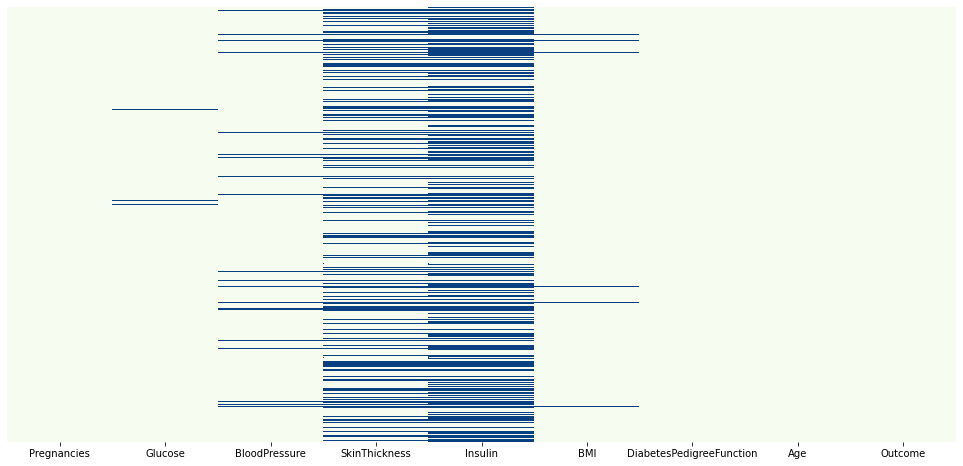

In [16]:
plt.figure(figsize = (17,8))
sns.heatmap(diabetes.isnull(),cbar = False, yticklabels= False,cmap = 'GnBu')

In [17]:
# Let's Calculate the Percentage of NaN values in each column.

In [18]:
missing_val_per = diabetes.isnull().sum()/ diabetes.shape[0] * 100 

In [19]:
missing_val_per

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [20]:
# Now we will remove those features which have more than 20% NaN values.

In [21]:
drop_columns = missing_val_per[missing_val_per>20].keys()

In [22]:
drop_columns

Index(['SkinThickness', 'Insulin'], dtype='object')

In [23]:
new_diabetes_df = diabetes.drop(columns = drop_columns)

In [24]:
new_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


<AxesSubplot:>

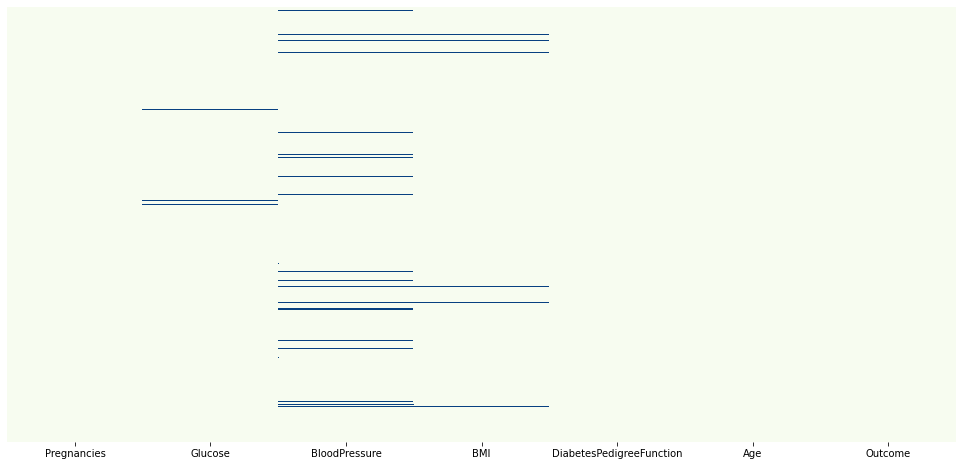

In [25]:
plt.figure(figsize = (17,8))
sns.heatmap(new_diabetes_df.isnull(),cbar = False, yticklabels= False,cmap = 'GnBu')

In [26]:
# Now let's fill those rows having NaN values with the median value.

In [27]:
new_diabetes_df.fillna(new_diabetes_df.median(), inplace = True)

In [28]:
new_diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
# So we have succesfully cleaned our data

In [30]:
new_diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# Now let's see if there is any correlation among the features..

<AxesSubplot:>

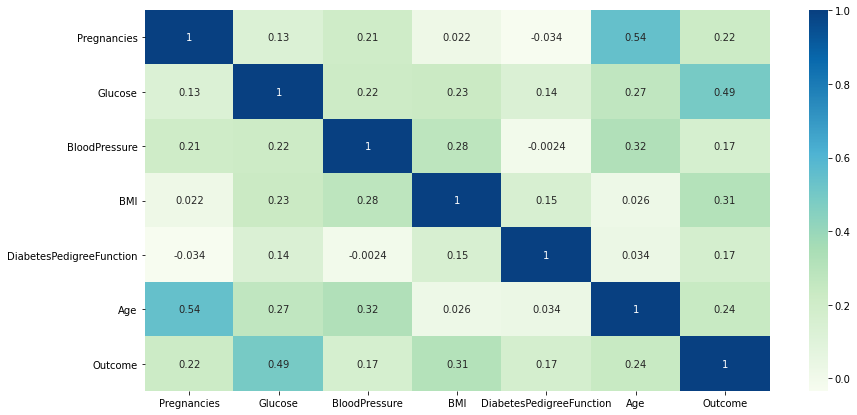

In [32]:
plt.figure(figsize = (14,7))
sns.heatmap(new_diabetes_df.corr(),annot = True, cmap = 'GnBu')

In [33]:
# Let's see what is the age distribution of our dataset..

<AxesSubplot:ylabel='Density'>

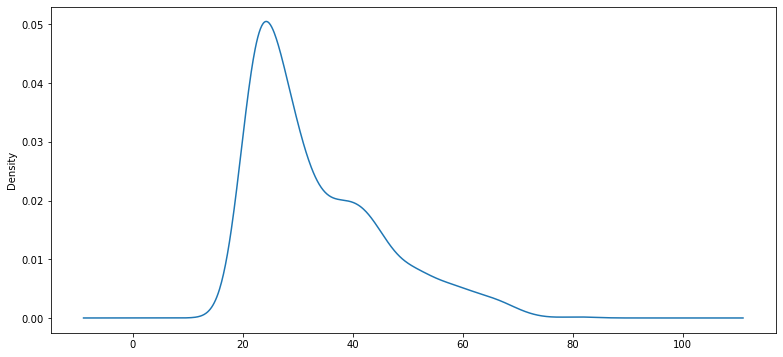

In [34]:
plt.figure(figsize = (13,6))
new_diabetes_df.Age.plot(kind = "kde")

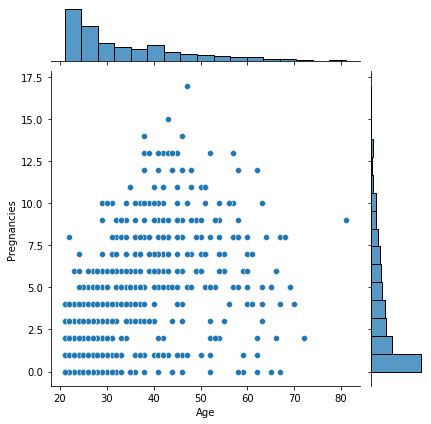

In [35]:
sns.jointplot(x='Age',y='Pregnancies',data=new_diabetes_df,kind='scatter')

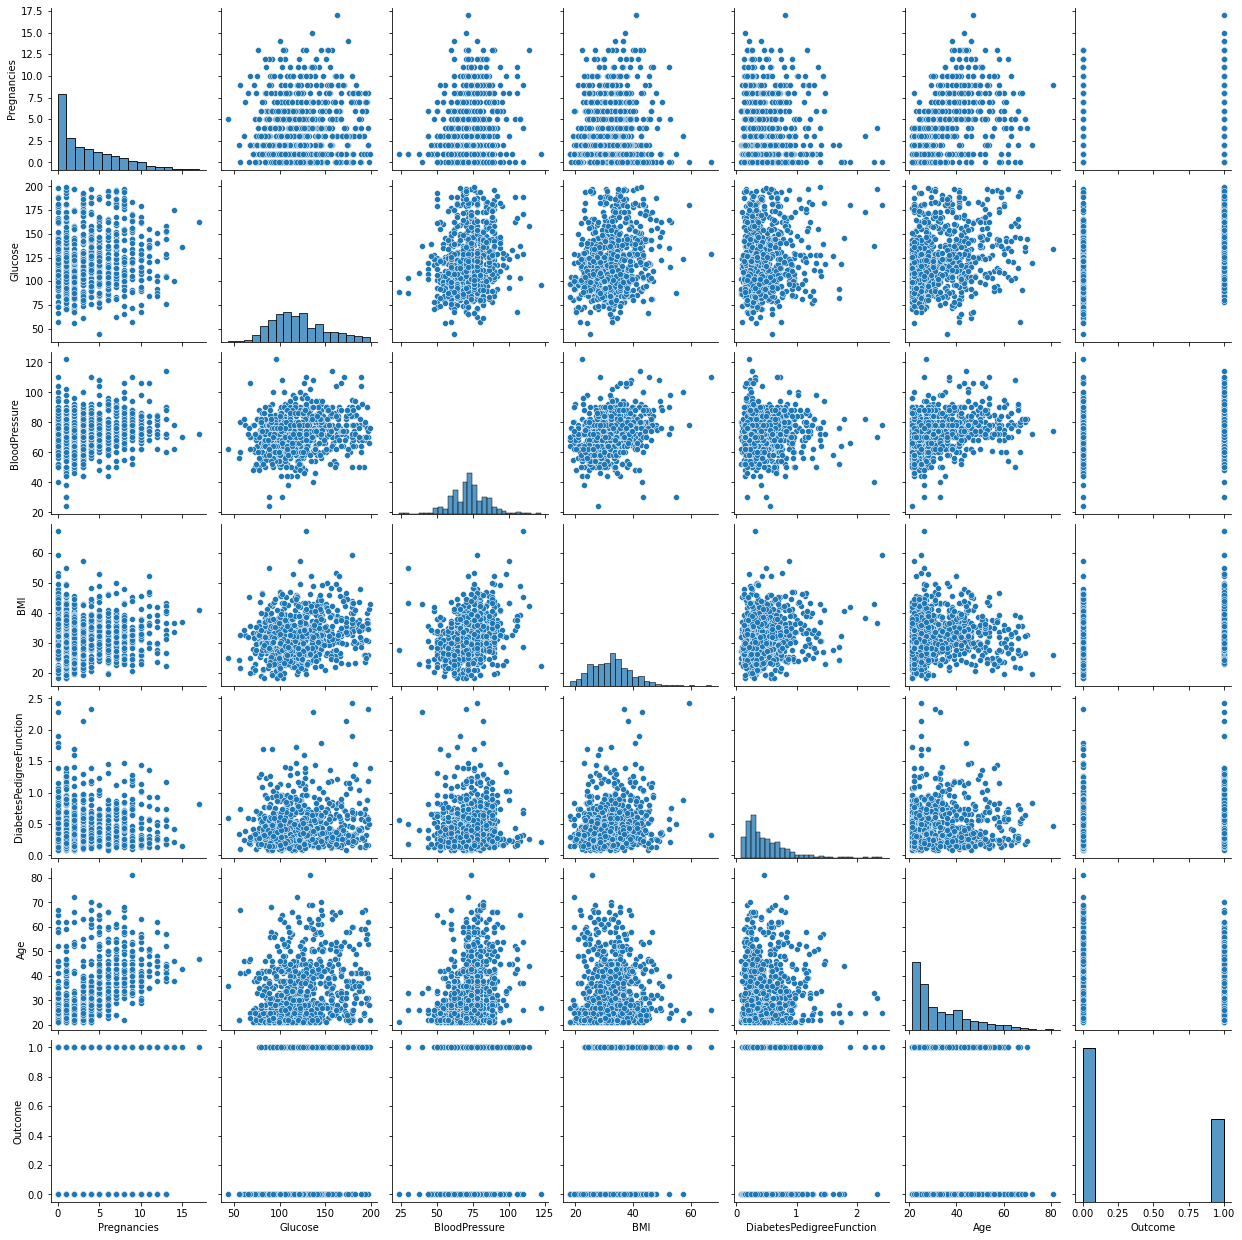

In [36]:
sns.pairplot(new_diabetes_df)

In [37]:
# Let's Plot the countplot of our 'Outcome' Feature.

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

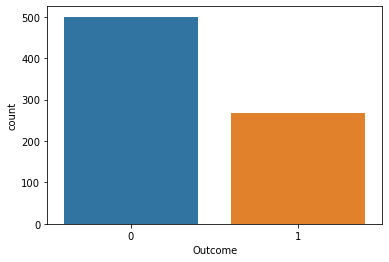

In [38]:
sns.countplot('Outcome', data = new_diabetes_df)

In [39]:
new_diabetes_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

 Let's check the BMI feature.
    Let's find people with BMI higher than 30.
 A BMI >= 30 is termed as 'Obese'.
 By previous research in this domain , it is proved that Obese people have higher chances of getting Diabetes.
Let's find how many 'Obese' people have Diabetes and prove the above statement.

In [40]:
# How many 'Obese' data do we have
new_diabetes_df.loc[new_diabetes_df['BMI'] >= 30,'BMI'].count()

483

In [41]:
diabetic = new_diabetes_df.loc[new_diabetes_df['Outcome'] == 1]
obese = diabetic.loc[diabetic['BMI'] >= 30,'BMI'].count()
print(obese)

221


In [42]:
new_diabetes_df.shape

(768, 7)

- So from total 768 people 483 people belong to 'Obese' category.
- Percentage of Obese patients in the dataset is 483/768 *100 = 62.9%
- And there are total 268 people having Diabetes from which 221 are Obese.
- Percentage of Obese people having diabetes is 221/268 * 100 = 82.46%

In [43]:
# Let's find the mean BloodPressure of patients having Diabetes.

In [44]:
df = new_diabetes_df.loc[new_diabetes_df["Outcome"] == 1, "BloodPressure"]

In [45]:
df.mean()

75.1231343283582

In [46]:
# So the mean BloodPressure of patients having 'Diabetes' is 75.12

 What is the Median Glucose level in the patients having diabetes..

In [47]:
new_diabetes_df.loc[new_diabetes_df["Outcome"] == 1, "Glucose"].median()

140.0

In [48]:
# The Median Glucose level in diabetic patients is 140

In [49]:
# We are ready to start with our training process.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = new_diabetes_df.drop("Outcome", axis = 1)
y = new_diabetes_df['Outcome']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [53]:
# We have successfully splitted our training and testing dataset.

We have to predict "Outcome" which is a categorical feature.
Therefore we will fit different types of classification models and select the one with the best accuracy.

In [54]:
# first Logistic Regression.

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression(max_iter= 10000)

In [58]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [59]:
prediction = log_model.predict(X_test)

In [60]:
# Let's test the performance of our Logistic Regression Model...

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       124
           1       0.70      0.59      0.64        68

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.73       192
weighted avg       0.76      0.77      0.76       192



In [64]:
print(confusion_matrix(y_test,prediction))

[[107  17]
 [ 28  40]]


In [63]:
log_model.score(X_test,y_test)

0.765625

In [65]:
# The accuracy of our logistic Regression model is 76.56% which is quite less.

In [66]:
# So now we will K-Nearest Neighbors model..

In [67]:
from sklearn.neighbors import  KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()  # So here we have to insert a value for 'K' as a parameter.

In [69]:
# So let's design a loop which will try to find the best 'K' value for our model by checking the error rate.

In [70]:
error_rate = []

for i in range(1,35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now let's see visually how the error rate changes for different values of 'K'.
- Note:- We will select a 'K' value with the least error.

Text(0, 0.5, 'Error Rate')

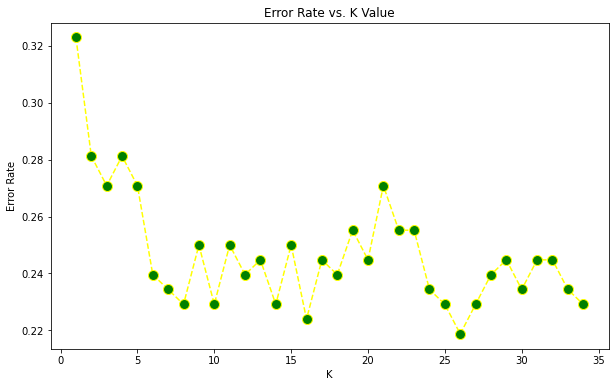

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate,color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

There are many instance where the error rate is very low, but we will select our "K" value as 26.

In [72]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
pre = knn.predict(X_test)

print("With K = 26")
print(confusion_matrix(y_test,pre))
print("\n")
print(classification_report(y_test,pre))

With K = 26
[[109  15]
 [ 27  41]]


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [73]:
knn.score(X_test,y_test)

0.78125

In [74]:
# The KNeighbors model gave us the accuracy of 78.12% which is better than Logistic model. But we can still improve.

In [75]:
# Support vector Machines.

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()

In [78]:
svc.fit(X_train,y_train)

SVC()

In [79]:
predict_Svc = svc.predict(X_test)

In [80]:
print(confusion_matrix(y_test,predict_Svc))
print("\n")
print(classification_report(y_test,predict_Svc))

[[114  10]
 [ 32  36]]


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       124
           1       0.78      0.53      0.63        68

    accuracy                           0.78       192
   macro avg       0.78      0.72      0.74       192
weighted avg       0.78      0.78      0.77       192



In [81]:
svc.score(X_test,y_test)

0.78125

In [82]:
# Interesting , the KNeighbors and the SVM model gave the same accuracy of 78.12%

In [83]:
# Decision Tree..

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
pred_dtree = dtree.predict(X_test)

In [88]:
print(confusion_matrix(y_test,pred_dtree))

[[94 30]
 [24 44]]


In [89]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       124
           1       0.59      0.65      0.62        68

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.73      0.72      0.72       192



In [90]:
dtree.score(X_test,y_test)

0.71875

In [91]:
# So, the accuracy of the Decision tree model is 71.87%

In [92]:
# Random Forest...

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators= 230)

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=230)

In [96]:
pred_rfc = rfc.predict(X_test)

In [97]:
print(confusion_matrix(y_test,pred_rfc))

[[104  20]
 [ 19  49]]


In [98]:
rfc.score(X_test,y_test)

0.796875

In [99]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       124
           1       0.71      0.72      0.72        68

    accuracy                           0.80       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192



Wow !! 
The Random Forest model gave us the best accuracy of 79.6%

 # So, That it !!!